Import Library and Data

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [177]:
df = pd.read_csv(r"C:\Users\jaykr\OneDrive\Desktop\Poly\IT2301_SUL\Assignment\RESALE.csv")

In [178]:
df.head()

,Full Address,Storey Range,Flat Model,Flat Type,Town,Town (group),Floor Area Sqm,Latitude,Longitude,Lease Commence Date,Year-Month Sold,Nearest Hawker,Nearest MRT,Nearest Primary School,Hawker Dist,Mrt Dist,School Dist,Resale Price
0,"45 TELOK BLANGAH DR,Singapore",10 TO 12,Improved,2 ROOM,BUKIT MERAH,Matured Estate,45.0,1.272139,103.809627,1976,1/1/2011,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,275000.0
1,"45 TELOK BLANGAH DR,Singapore",13 TO 15,Improved,2 ROOM,BUKIT MERAH,Matured Estate,54.0,1.272139,103.809627,1976,1/1/2011,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.157899,0.153912,0.454797,285000.0
2,"106 BT PURMEI RD,Singapore",10 TO 12,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273075,103.825658,1984,1/1/2011,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.767276,0.962478,0.265618,509000.0
3,"50 TELOK BLANGAH DR,Singapore",07 TO 09,New Generation,4 ROOM,BUKIT MERAH,Matured Estate,98.0,1.273087,103.810080,1978,1/1/2011,Blk 11 Telok Blangah Crescent,TELOK BLANGAH MRT STATION,Blangah Rise Primary School,1.063867,0.260606,0.372768,526000.0
4,"108 BT PURMEI RD,Singapore",04 TO 06,Model A,4 ROOM,BUKIT MERAH,Matured Estate,104.0,1.273441,103.825477,1984,1/1/2011,Blk 112 Jalan Bukit Merah,HARBOURFRONT MRT STATION,Radin Mas Primary School,0.728191,0.988774,0.221545,540000.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183905 entries, 0 to 183904
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Full Address            183905 non-null  object 
 1   Storey Range            183905 non-null  object 
 2   Flat Model              183905 non-null  object 
 3   Flat Type               183905 non-null  object 
 4   Town                    183905 non-null  object 
 5   Town (group)            183905 non-null  object 
 6   Floor Area Sqm          183905 non-null  float64
 7   Latitude                183905 non-null  float64
 8   Longitude               183905 non-null  float64
 9   Lease Commence Date     183905 non-null  int64  
 10  Year-Month Sold         183905 non-null  object 
 11  Nearest Hawker          183905 non-null  object 
 12  Nearest MRT             183905 non-null  object 
 13  Nearest Primary School  183905 non-null  object 
 14  Hawker Dist         

In [180]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
                              Full Address Storey Range         Flat Model  \
115         7 TELOK BLANGAH CRES,Singapore     10 TO 12           Improved   
191           257 TAMPINES ST 21,Singapore     10 TO 12     New Generation   
643           440 TAMPINES ST 43,Singapore     10 TO 12         Simplified   
1067         346 BT BATOK ST 34, Singapore     07 TO 09            Model A   
1300             28 HOY FATT RD, Singapore     07 TO 09           Standard   
...                                    ...          ...                ...   
181695  490A CHOA CHU KANG AVE 5,Singapore     04 TO 06            Model A   
181969             547D SEGAR RD,Singapore     07 TO 09            Model A   
182313     668B EDGEFIELD PLAINS,Singapore     04 TO 06  Premium Apartment   
182619      889D WOODLANDS DR 50,Singapore     07 TO 09            Model A   
183057       311B CLEMENTI AVE 4,Singapore     34 TO 36               DBSS   

       Flat Type           Town        Town (gr

In [181]:
df.isnull().sum()

Full Address              0
Storey Range              0
Flat Model                0
Flat Type                 0
Town                      0
Town (group)              0
Floor Area Sqm            0
Latitude                  0
Longitude                 0
Lease Commence Date       0
Year-Month Sold           0
Nearest Hawker            0
Nearest MRT               0
Nearest Primary School    0
Hawker Dist               0
Mrt Dist                  0
School Dist               0
Resale Price              0
dtype: int64

There are No Null / Missing Values here and we can start our data cleaning by remove the Full Address field

Data Cleaning Portion

In [182]:
#Remove Unncessary Columns that would affect the 'Resale Price' such as Full Address , Latitude and Longitude
columns_to_remove = ['Full Address', 'Latitude', 'Longitude' , 'Nearest Hawker' , 'Nearest MRT' , 'Nearest Primary School','Town (group)' ]
df = df.drop(columns=columns_to_remove)

In [183]:
#Check for any Outlier in unique columns
df['Storey Range'].unique()

array(['10 TO 12', '13 TO 15', '07 TO 09', '04 TO 06', '19 TO 21',
       '01 TO 03', '16 TO 18', '22 TO 24', '25 TO 27', '28 TO 30',
       '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '103.7965865',
       '43 TO 45', '46 TO 48', '49 TO 51'], dtype=object)

As you can see there is an outlier here, which is the '103.7965865' value. We will remove this outlier by using the following code

In [184]:
df = df[df['Storey Range'] != '103.7965865']

In [185]:
df['Storey Range'].unique()

array(['10 TO 12', '13 TO 15', '07 TO 09', '04 TO 06', '19 TO 21',
       '01 TO 03', '16 TO 18', '22 TO 24', '25 TO 27', '28 TO 30',
       '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '43 TO 45',
       '46 TO 48', '49 TO 51'], dtype=object)

In [186]:
# Split the 'Storey Range' column into two new columns 'Lower' and 'Upper'
df[['Lower', 'Upper']] = df['Storey Range'].str.split(' TO ', expand=True)

# Convert the 'Lower' and 'Upper' columns to numeric values, coerce non-numeric values to NaN
df['Lower'] = pd.to_numeric(df['Lower'], errors='coerce')
df['Upper'] = pd.to_numeric(df['Upper'], errors='coerce')
df['storey_mean'] = df[['Lower', 'Upper']].mean(axis=1)

In [187]:
df.head()

,Storey Range,Flat Model,Flat Type,Town,Floor Area Sqm,Lease Commence Date,Year-Month Sold,Hawker Dist,Mrt Dist,School Dist,Resale Price,Lower,Upper,storey_mean
0,10 TO 12,Improved,2 ROOM,BUKIT MERAH,45.0,1976,1/1/2011,1.157899,0.153912,0.454797,275000.0,10,12,11.0
1,13 TO 15,Improved,2 ROOM,BUKIT MERAH,54.0,1976,1/1/2011,1.157899,0.153912,0.454797,285000.0,13,15,14.0
2,10 TO 12,Model A,4 ROOM,BUKIT MERAH,104.0,1984,1/1/2011,0.767276,0.962478,0.265618,509000.0,10,12,11.0
3,07 TO 09,New Generation,4 ROOM,BUKIT MERAH,98.0,1978,1/1/2011,1.063867,0.260606,0.372768,526000.0,7,9,8.0
4,04 TO 06,Model A,4 ROOM,BUKIT MERAH,104.0,1984,1/1/2011,0.728191,0.988774,0.221545,540000.0,4,6,5.0


In [188]:
# Function to categorize 'storey_mean' into 'unit_evaluation'
def categorize_unit_evaluation(mean_value):
    if mean_value >= 2 and mean_value <= 4:
        return 'Low'
    elif mean_value >= 5 and mean_value <= 8:
        return 'Medium'
    elif mean_value >= 9:
        return 'High'
    else:
        return 'Unknown'
    
# Low floor units:
# Generally, property agents define low floor units as units located on the 2nd, 3rd, and 4th floors.
# These units are favored for convenience as it is faster to walk down stairs than wait for a lift from upper floors.
# Some parents appreciate the ability to keep a close eye on their children playing outside.
# Low floor units are generally more affordable than mid-floor and high-floor units.
# However, they may suffer from similar problems as ground-floor units, such as being gloomy and stuffy.
# Advantages: Affordability and close supervision of outdoor activities.
# Disadvantages: Similar to ground-floor units, with possible gloomy and stuffy conditions.

# Mid-floor units:
# Property agents define mid-floor units as those located on the 5th to 8th floors.
# They offer a good compromise between low and high-floor units in terms of affordability and features.
# Mid-floor units are more affordable than high-floor units but still provide a decent view, good breeze, and atmosphere.
# Some sellers may charge a COV equivalent to that of a high-floor unit, so it's best to explore a range of units with your property agent.
# Advantages: A good balance between price and views.
# Disadvantage: Some sellers may charge a high COV equivalent to high-floor units.

# High-floor units:
# Property agents consider high-floor units to be located on the 9th floor and above.
# They offer great views and atmosphere, especially from higher point blocks.
# However, units located at the very top may get warm with little buffer from direct sunlight, creating a stuffy atmosphere at night.
# Some unwanted activities may occur on stairwells, particularly in less affluent areas.
# In certain cases, very high units in newly-built 30-50 storey blocks may come with a high COV premium.
# Advantages: Breezy with great views in some cases.
# Disadvantages: Very high-floor units may get warm, and they can be pricey as you go higher.

# Apply the categorization function to create the 'unit_evaluation' column
df['unit_evaluation'] = df['storey_mean'].apply(categorize_unit_evaluation)

In [189]:
df.head()

,Storey Range,Flat Model,Flat Type,Town,Floor Area Sqm,Lease Commence Date,Year-Month Sold,Hawker Dist,Mrt Dist,School Dist,Resale Price,Lower,Upper,storey_mean,unit_evaluation
0,10 TO 12,Improved,2 ROOM,BUKIT MERAH,45.0,1976,1/1/2011,1.157899,0.153912,0.454797,275000.0,10,12,11.0,High
1,13 TO 15,Improved,2 ROOM,BUKIT MERAH,54.0,1976,1/1/2011,1.157899,0.153912,0.454797,285000.0,13,15,14.0,High
2,10 TO 12,Model A,4 ROOM,BUKIT MERAH,104.0,1984,1/1/2011,0.767276,0.962478,0.265618,509000.0,10,12,11.0,High
3,07 TO 09,New Generation,4 ROOM,BUKIT MERAH,98.0,1978,1/1/2011,1.063867,0.260606,0.372768,526000.0,7,9,8.0,Medium
4,04 TO 06,Model A,4 ROOM,BUKIT MERAH,104.0,1984,1/1/2011,0.728191,0.988774,0.221545,540000.0,4,6,5.0,Medium


In [190]:
# Drop the 'Lower', 'Upper', and 'storey_mean' columns
columns_to_remove = ['Lower', 'Upper', 'storey_mean']
df = df.drop(columns=columns_to_remove)


Getting the Age of the Unit

In [191]:
# Convert 'Year-Month Sold' column to a datetime type
df['Year-Month Sold'] = pd.to_datetime(df['Year-Month Sold'])

# Extract the year from the 'Year-Month Sold' column and create a new column 'Year Sold'
df['Year Sold'] = df['Year-Month Sold'].dt.year

# Calculate the age of the property at the time of sale and create a new column 'Unit_Age'
df['Unit_Age'] = df['Year Sold'] - df['Lease Commence Date']

excluded_rows = df[df['Unit_Age'] < 0]
excluded_rows

,Storey Range,Flat Model,Flat Type,Town,Floor Area Sqm,Lease Commence Date,Year-Month Sold,Hawker Dist,Mrt Dist,School Dist,Resale Price,unit_evaluation,Year Sold,Unit_Age
57398,07 TO 09,Model A,4 ROOM,QUEENSTOWN,95.0,2012,2011-01-02,0.931795,0.762004,0.654825,616000.0,Medium,2011,-1


In [192]:
df.drop(columns=['Year Sold'], inplace=True)
df.drop(columns=['Year-Month Sold'], inplace=True)


In [204]:
unique_floor_area_sqm = sorted(df['Floor Area Sqm'].unique())
unique_floor_area_sqm

[31.0,
 34.0,
 35.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 60.3,
 61.0,
 62.0,
 63.0,
 63.1,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 68.8,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 83.1,
 84.0,
 85.0,
 86.0,
 87.0,
 87.1,
 88.0,
 88.1,
 89.0,
 89.1,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 160.0,
 

In [206]:
# Calculate the mean and standard deviation of 'Floor Area Sqm'
mean_floor_area_sqm = df['Floor Area Sqm'].mean()
std_floor_area_sqm = df['Floor Area Sqm'].std()

# Calculate the z-scores for each value in the 'Floor Area Sqm' column
z_scores_floor_area_sqm = (df['Floor Area Sqm'] - mean_floor_area_sqm) / std_floor_area_sqm

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Get the rows with 'Floor Area Sqm' values that have z-scores greater than the threshold (potential outliers)
outliers_floor_area_sqm = df[abs(z_scores_floor_area_sqm) > threshold]

# Print the potential outliers
print("Potential outliers in 'Floor Area Sqm':")
outliers_floor_area_sqm

Potential outliers in 'Floor Area Sqm':


,Storey Range,Flat Model,Flat Type,Town,Floor Area Sqm,Lease Commence Date,Hawker Dist,Mrt Dist,School Dist,Resale Price,unit_evaluation,Unit_Age
33633,01 TO 03,Terrace,3 ROOM,KALLANG/WHAMPOA,210.0,1972,1.025770,1.067634,0.639364,818000.0,Low,39
33646,01 TO 03,Terrace,3 ROOM,KALLANG/WHAMPOA,215.0,1972,1.065290,1.023202,0.602752,830000.0,Low,45
33648,01 TO 03,Terrace,3 ROOM,KALLANG/WHAMPOA,237.0,1972,1.046707,1.038194,0.623378,1185000.0,Low,46
33663,01 TO 03,Terrace,3 ROOM,KALLANG/WHAMPOA,249.0,1972,0.992202,1.086939,0.740244,1053888.0,Low,45
33665,01 TO 03,Terrace,3 ROOM,KALLANG/WHAMPOA,174.0,1972,1.002039,1.073381,0.714142,950000.0,Low,46
...,...,...,...,...,...,...,...,...,...,...,...,...
183245,04 TO 06,Adjoined flat,EXECUTIVE,BEDOK,176.0,1978,0.708729,0.944800,0.561565,838000.0,Medium,43
183483,10 TO 12,Apartment,EXECUTIVE,WOODLANDS,176.0,1994,1.550331,0.426206,0.238645,685000.0,High,25
183613,10 TO 12,Apartment,EXECUTIVE,WOODLANDS,187.0,1995,0.627148,0.722939,0.884621,612000.0,High,24
183638,07 TO 09,Apartment,EXECUTIVE,WOODLANDS,179.0,1994,1.449284,0.662759,0.195095,702000.0,Medium,25


In [193]:
df['Unit_Age'].unique()

array([35, 27, 33, 32,  9,  8, 34, 36, 31, 30, 28, 11, 42,  5, 37, 10, 38,
       15, 44, 39, 40, 41, 43, 17, 22,  4, 26, 29, 25,  3, 24, 23,  6, 46,
       50, 51, 48,  2, 47, 49, 20, 19, 12, 13, 14, 16, 18,  7, 45, 52, 21,
       53,  1, -1, 54], dtype=int64)

Since there are Unit Ages between the Lease Commence Date and Year Sold which are negative these are invalid data. Hence, we will remove them from the dataset.

In [194]:
# Filter and remove rows with unit ages below 0
df = df[df['Unit_Age'] >= 0]

# Display unique unit ages after filtering
df['Unit_Age'].unique()

array([35, 27, 33, 32,  9,  8, 34, 36, 31, 30, 28, 11, 42,  5, 37, 10, 38,
       15, 44, 39, 40, 41, 43, 17, 22,  4, 26, 29, 25,  3, 24, 23,  6, 46,
       50, 51, 48,  2, 47, 49, 20, 19, 12, 13, 14, 16, 18,  7, 45, 52, 21,
       53,  1, 54], dtype=int64)

In [195]:
df.head()

,Storey Range,Flat Model,Flat Type,Town,Floor Area Sqm,Lease Commence Date,Hawker Dist,Mrt Dist,School Dist,Resale Price,unit_evaluation,Unit_Age
0,10 TO 12,Improved,2 ROOM,BUKIT MERAH,45.0,1976,1.157899,0.153912,0.454797,275000.0,High,35
1,13 TO 15,Improved,2 ROOM,BUKIT MERAH,54.0,1976,1.157899,0.153912,0.454797,285000.0,High,35
2,10 TO 12,Model A,4 ROOM,BUKIT MERAH,104.0,1984,0.767276,0.962478,0.265618,509000.0,High,27
3,07 TO 09,New Generation,4 ROOM,BUKIT MERAH,98.0,1978,1.063867,0.260606,0.372768,526000.0,Medium,33
4,04 TO 06,Model A,4 ROOM,BUKIT MERAH,104.0,1984,0.728191,0.988774,0.221545,540000.0,Medium,27


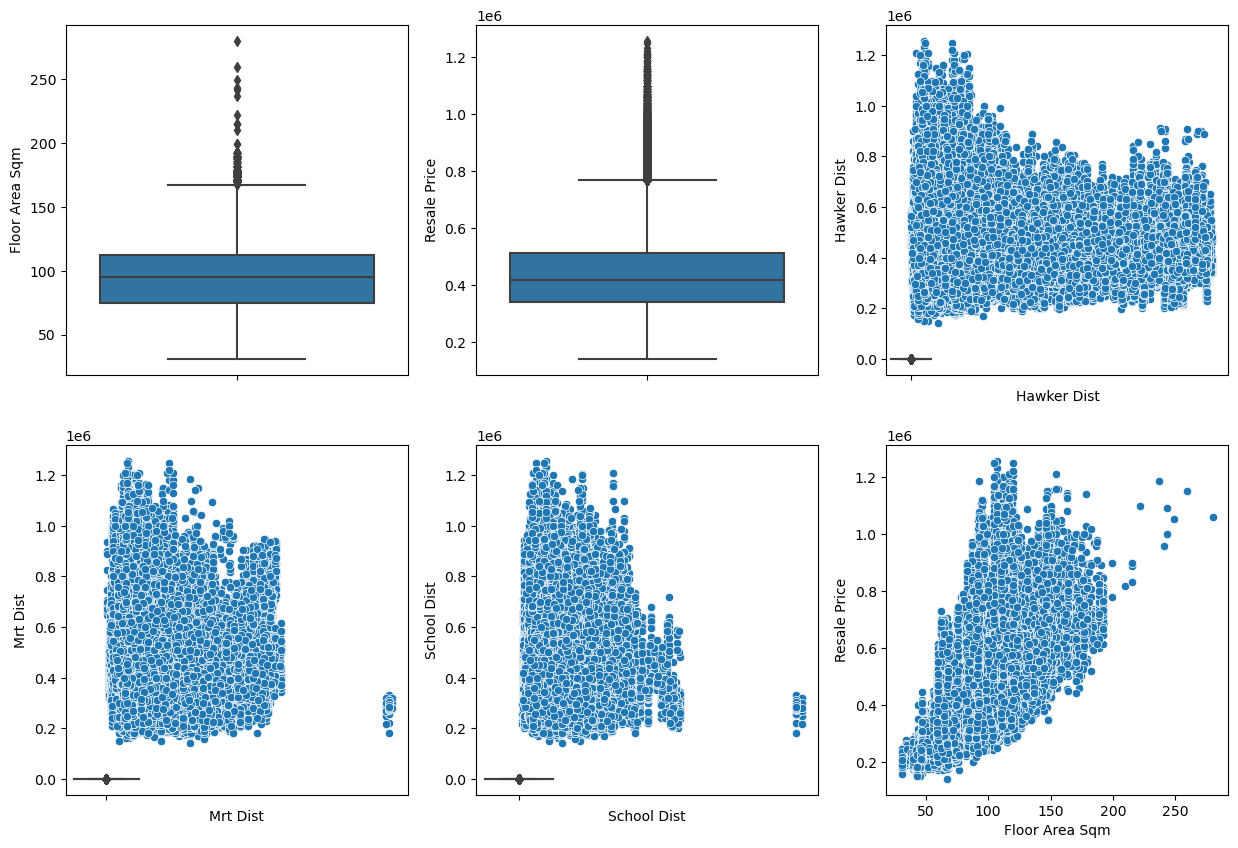

MemoryError: Unable to allocate 252. GiB for an array with shape (183903, 183903) and data type float64

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the relevant columns

# Create subplots for each numeric variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot box plots for each numeric variable
sns.boxplot(data=df, y='Floor Area Sqm', ax=axes[0, 0])
sns.boxplot(data=df, y='Resale Price', ax=axes[0, 1])
sns.boxplot(data=df, y='Hawker Dist', ax=axes[0, 2])
sns.boxplot(data=df, y='Mrt Dist', ax=axes[1, 0])
sns.boxplot(data=df, y='School Dist', ax=axes[1, 1])

# Plot scatter plots for each numeric variable against resale price
sns.scatterplot(data=df, x='Floor Area Sqm', y='Resale Price', ax=axes[1, 2])
sns.scatterplot(data=df, x='Hawker Dist', y='Resale Price', ax=axes[0, 2])
sns.scatterplot(data=df, x='Mrt Dist', y='Resale Price', ax=axes[1, 0])
sns.scatterplot(data=df, x='School Dist', y='Resale Price', ax=axes[1, 1])

# Show the plots
plt.show()

# Calculate z-scores for each numeric variable
z_scores = pd.DataFrame()
z_scores['Floor Area Sqm'] = (df['Floor Area Sqm'] - df['Floor Area Sqm'].mean()) / df['Floor Area Sqm'].std()
z_scores['Resale Price'] = (df['Resale Price'] - df['Resale Price'].mean()) / df['Resale Price'].std()
z_scores['Hawker Dist'] = (df['Hawker Dist'] - df['Hawker Dist'].mean()) / df['Hawker Dist'].std()
z_scores['Mrt Dist'] = (df['Mrt Dist'] - df['Mrt Dist'].mean()) / df['Mrt Dist'].std()
z_scores['School Dist'] = (df['School Dist'] - df['School Dist'].mean()) / df['School Dist'].std()

# Print rows with z-scores greater than 3 or less than -3 (potential outliers)
outliers = df[(z_scores > 3) | (z_scores < -3).any(axis=1)]
print("Rows with potential outliers:")
print(outliers)

In [196]:
df.to_csv('clean_Resale.csv')
df

,Storey Range,Flat Model,Flat Type,Town,Floor Area Sqm,Lease Commence Date,Hawker Dist,Mrt Dist,School Dist,Resale Price,unit_evaluation,Unit_Age
0,10 TO 12,Improved,2 ROOM,BUKIT MERAH,45.0,1976,1.157899,0.153912,0.454797,275000.0,High,35
1,13 TO 15,Improved,2 ROOM,BUKIT MERAH,54.0,1976,1.157899,0.153912,0.454797,285000.0,High,35
2,10 TO 12,Model A,4 ROOM,BUKIT MERAH,104.0,1984,0.767276,0.962478,0.265618,509000.0,High,27
3,07 TO 09,New Generation,4 ROOM,BUKIT MERAH,98.0,1978,1.063867,0.260606,0.372768,526000.0,Medium,33
4,04 TO 06,Model A,4 ROOM,BUKIT MERAH,104.0,1984,0.728191,0.988774,0.221545,540000.0,Medium,27
...,...,...,...,...,...,...,...,...,...,...,...,...
183900,13 TO 15,Model A,3 ROOM,QUEENSTOWN,67.0,2013,0.441767,0.571306,0.835962,585000.0,High,6
183901,31 TO 33,Model A,4 ROOM,QUEENSTOWN,92.0,2013,0.441767,0.571306,0.835962,820000.0,High,6
183902,07 TO 09,Improved,3 ROOM,KALLANG/WHAMPOA,59.0,1981,0.425732,0.231312,0.642435,338000.0,Medium,38
183903,16 TO 18,Model A,4 ROOM,CENTRAL AREA,75.0,2003,0.337507,0.358869,0.436688,483000.0,High,16
